# Exploratory Data Analysis

## Load data into dataframe

In [1]:
from process import StockDataProcessor
from config import tickers, start_date, end_date
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
storage_path = 'raw.csv'
data_processor = StockDataProcessor()
data_processor.load_raw_to_df(storage_path, tickers)

In [3]:
data_processor.df

,Open,High,Low,Close,Volume,Ticker,Collect Date
0,16.100000,16.396667,15.942000,16.312668,92439000.0,TSLA,2019-10-01
1,16.219334,16.309999,15.962000,16.208668,84471000.0,TSLA,2019-10-02
2,15.457333,15.632000,14.952000,15.535333,226267504.0,TSLA,2019-10-03
3,15.440667,15.652000,15.204667,15.428667,119925000.0,TSLA,2019-10-04
4,15.320000,15.904000,15.236667,15.848000,120963000.0,TSLA,2019-10-07
...,...,...,...,...,...,...,...
65560,2894.000000,2931.500000,2863.000000,2882.500000,24980800.0,7203.T,2025-01-24
65561,2913.500000,2941.500000,2910.500000,2922.000000,18257200.0,7203.T,2025-01-27
65562,2900.000000,2936.000000,2889.500000,2889.500000,18314000.0,7203.T,2025-01-28
65563,2917.000000,2936.500000,2898.500000,2930.000000,17997800.0,7203.T,2025-01-29


In [4]:
df = data_processor.get_sub_df(start_date, end_date)

In [5]:
df

,Open,High,Low,Close,Volume,Ticker,Collect Date
67,NaN,NaN,NaN,NaN,NaN,TSLA,2020-01-01
68,28.299999,28.713333,28.114000,28.684000,142981504.0,TSLA,2020-01-02
69,29.366667,30.266666,29.128000,29.534000,266677504.0,TSLA,2020-01-03
70,29.364668,30.104000,29.333332,30.102667,151995008.0,TSLA,2020-01-06
71,30.760000,31.441999,30.224001,31.270666,268231504.0,TSLA,2020-01-07
...,...,...,...,...,...,...,...
65538,2830.000000,2964.500000,2792.500000,2964.500000,55113700.0,7203.T,2024-12-25
65539,3000.000000,3164.000000,2995.000000,3142.000000,63975100.0,7203.T,2024-12-26
65540,3204.000000,3220.000000,3154.000000,3188.000000,49315300.0,7203.T,2024-12-27
65541,3182.000000,3189.000000,3136.000000,3146.000000,24224200.0,7203.T,2024-12-30


## Phân tích sơ bộ

Ta chọn hai cổ phiếu để phân tích, đó là `AAPL` và `NVDA`.

In [6]:
aapl_df = df[df['Ticker'] == 'AAPL']
nvda_df = df[df['Ticker'] == 'NVDA']

In [7]:
aapl_df.head()

,Open,High,Low,Close,Volume,Ticker,Collect Date
55867,NaN,NaN,NaN,NaN,NaN,AAPL,2020-01-01
55868,71.721024,72.776604,71.466820,72.716080,135480400.0,AAPL,2020-01-02
55869,71.941315,72.771729,71.783943,72.009102,146322800.0,AAPL,2020-01-03
55870,71.127876,72.621651,70.876083,72.582916,118387200.0,AAPL,2020-01-06
55871,72.592606,72.849236,72.021248,72.241562,108872000.0,AAPL,2020-01-07


In [8]:
nvda_df.head()

,Open,High,Low,Close,Volume,Ticker,Collect Date
29362,NaN,NaN,NaN,NaN,NaN,NVDA,2020-01-01
29363,5.943831,5.972710,5.893293,5.972710,237536000.0,NVDA,2020-01-02
29364,5.852963,5.920929,5.828068,5.877112,205384000.0,NVDA,2020-01-03
29365,5.783753,5.906987,5.757613,5.901759,262636000.0,NVDA,2020-01-06
29366,5.930139,6.019016,5.885078,5.973208,314856000.0,NVDA,2020-01-07


### Xu hướng giá

Sử dụng các đặc trưng:
* SMA 50: Trung bình động trong 50 ngày - Phản ánh xu hướng tăng trung hạn
* SMA 200: Trung bình động trong 200 ngày - Phản ánh xu hướng tăng dài hạn

In [9]:
def plot_price_trend(df: pd.DataFrame, ticker: str):
    temp_df = df[df['Open'].isna() != True].copy()
    temp_df['SMA_50'] = temp_df['Close'].rolling(50).mean(numeric_only=True)
    temp_df['SMA_200'] = temp_df['Close'].rolling(200).mean(numeric_only=True)
    plt.figure(figsize=(12,8))
    plt.plot(temp_df['Close'], label='Close Price')
    plt.plot(temp_df['SMA_50'], label='SMA 50 days')
    plt.plot(temp_df['SMA_200'], label='SMA 200 days')
    plt.legend()
    plt.title(f'Price trend of {ticker}')
    plt.show()

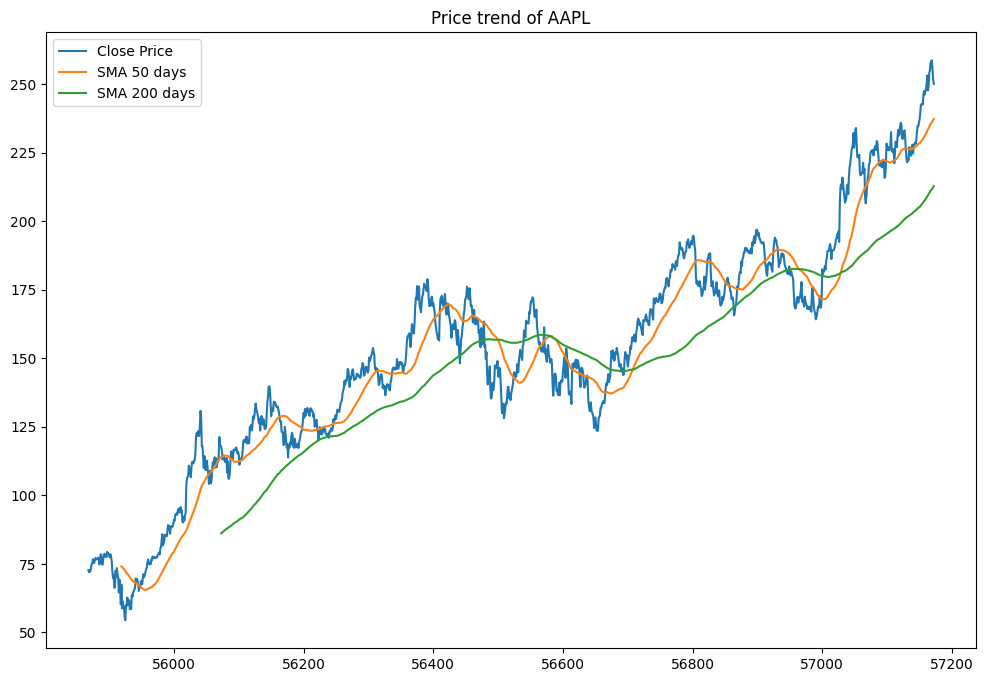

In [10]:
plot_price_trend(aapl_df, 'AAPL')

Từ biểu đồ, qua đường màu xanh (SMA 200), ta thấy xu hướng dài hạn là giá đóng cửa của cổ phiếu này có xu hướng tăng theo thời gian. Đặc biệt có nhiều thời điểm đường màu cam ở trên đường màu xanh, phản ánh xu hướng tăng mạnh (Golden Cross).

Tuy vậy, vẫn có những điểm giao mà tại đó đường màu cam ở dưới, đây là một số điểm phản ánh những tín hiệu giao dịch quan trọng cần để ý.

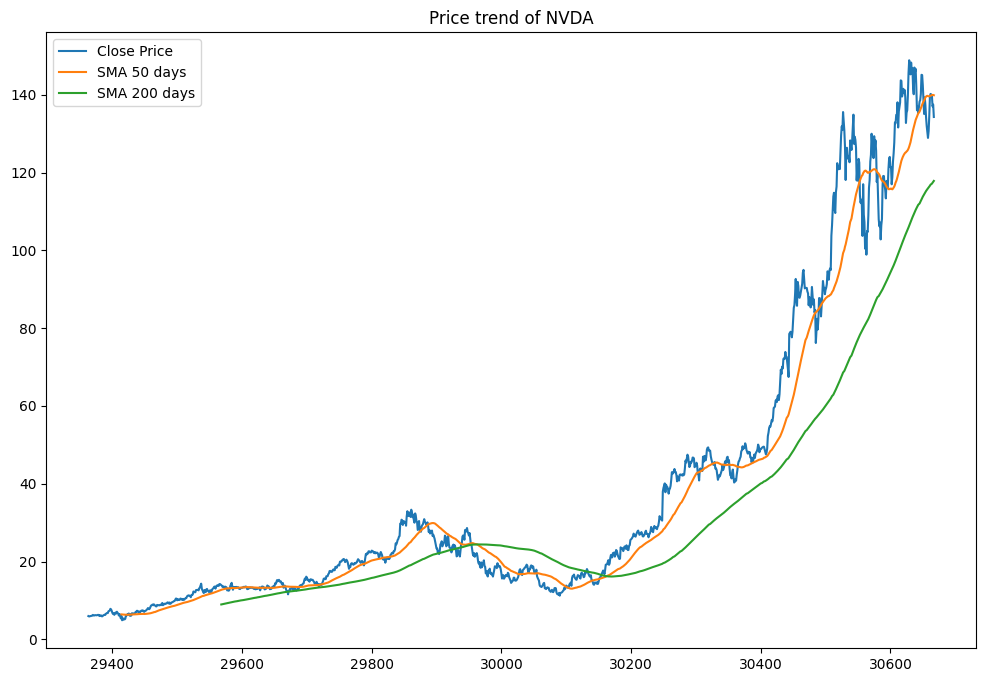

In [11]:
plot_price_trend(nvda_df, 'NVDA')

Cổ phiếu của NVDA cũng có xu hướng tương tự, và đặc biệt, quãng thời gian đường màu cam đi xuống đường màu xanh ở 2 cổ phiếu này khá tương đồng.

Đó là quãng thời gian từ tháng 3 năm 2022 tới đầu năm 2023. Điều này có thể xảy ra do lạm phát, chiến tranh Nga-Ukraine

### Biến động giá

In [12]:
def plot_price_volatility(df: pd.DataFrame, ticker: str):
    temp_df = df[df['Open'].isna() != True].copy()
    temp_df['Volatility'] = temp_df['Close'].pct_change(fill_method=None).rolling(30).std()
    plt.figure(figsize=(12,8))
    plt.plot(temp_df['Volatility'], label='Volatility of Close Price')
    plt.legend()
    plt.title(f'Price Volatility of {ticker}')
    plt.show()

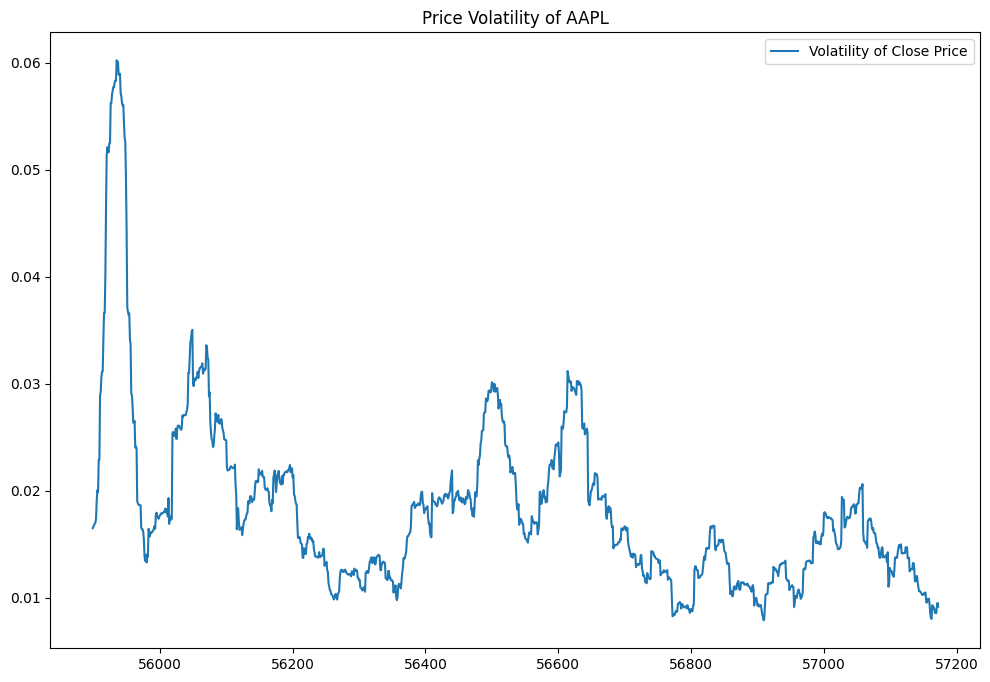

In [13]:
plot_price_volatility(aapl_df, 'AAPL')

Giai đoạn đầu cổ phiếu biến động khá lớn, nhưng càng về sau càng ổn định. Nhưng theo đó vẫn có biến động lớn trong giai đoạn mà SMA 50 < SMA 200 như đã nhận xét ở phần trước. 

Điều tương tự cũng tới với NVDA. Điểm khác biệt là độ biến động giá của NVDA thường ở mức cao.

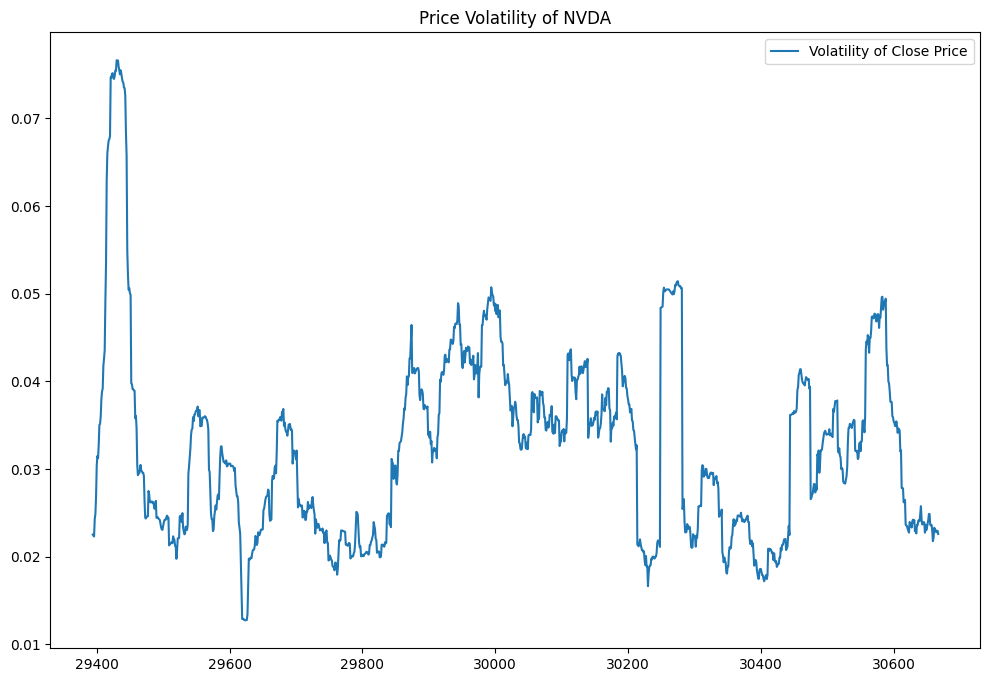

In [14]:
plot_price_volatility(nvda_df, 'NVDA')

### Volume each year

In [15]:
def plot_volume_each_year(df: pd.DataFrame, ticker: str):
    df["Year"] = df['Collect Date'].dt.year
    df.groupby("Year")["Volume"].mean().plot(kind="bar", figsize=(12, 8), title=f"Volume each year of {ticker}")
    plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_18400\3119603569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Collect Date'].dt.year


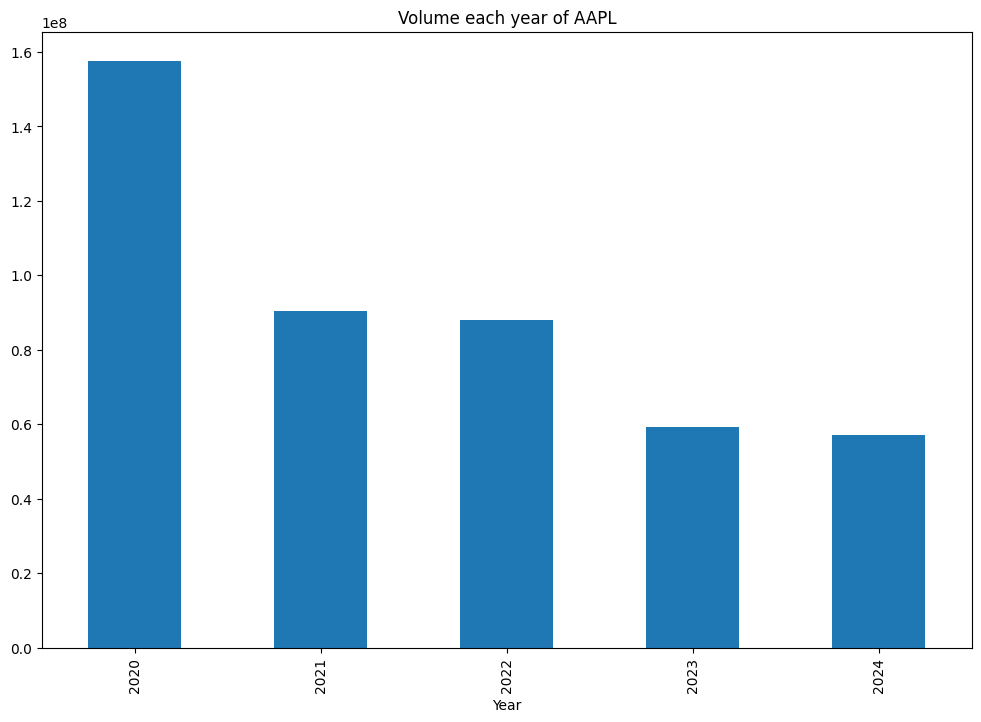

In [16]:
plot_volume_each_year(aapl_df, 'AAPL')

Có thể thấy khối lượng giao dịch của AAPL có khả năng là thấp khi giá cổ phiếu cao (năm gần nhất) và ngược lại, khi giá thấp thì khối lượng giao dịch khá lớn.

C:\Users\admin\AppData\Local\Temp\ipykernel_18400\3119603569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Year"] = df['Collect Date'].dt.year


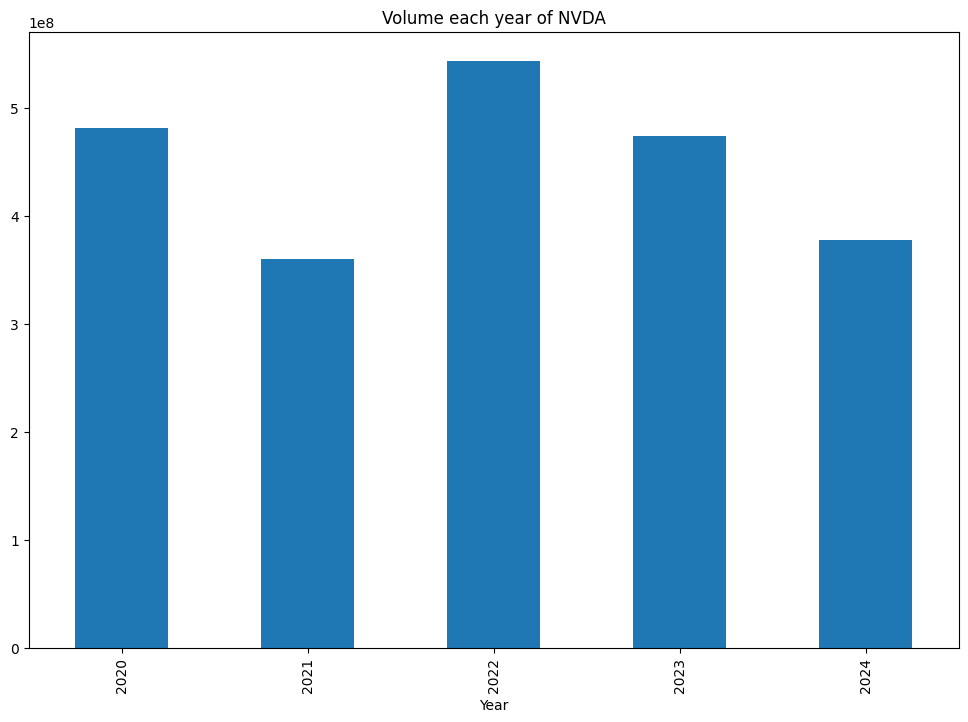

In [17]:
plot_volume_each_year(nvda_df, 'NVDA')

Khối lượng giao dịch của NVDA thì bất thường hơn, phù hợp với tính biến động cao của NVDA trong giai đoạn này.

### Mối quan hệ giữa giá đóng cửa và khối lượng giao dịch

In [18]:
def plot_close_volume(df: pd.DataFrame, ticker: str):
    # Vẽ Scatter Plot (Price vs Volume)
    plt.figure(figsize=(12, 5))
    plt.scatter(df["Close"], df["Volume"], alpha=0.5)
    plt.xlabel("Close Price")
    plt.ylabel("Volume")
    plt.title(f"Relationship between close price and volome of {ticker}")
    plt.show()

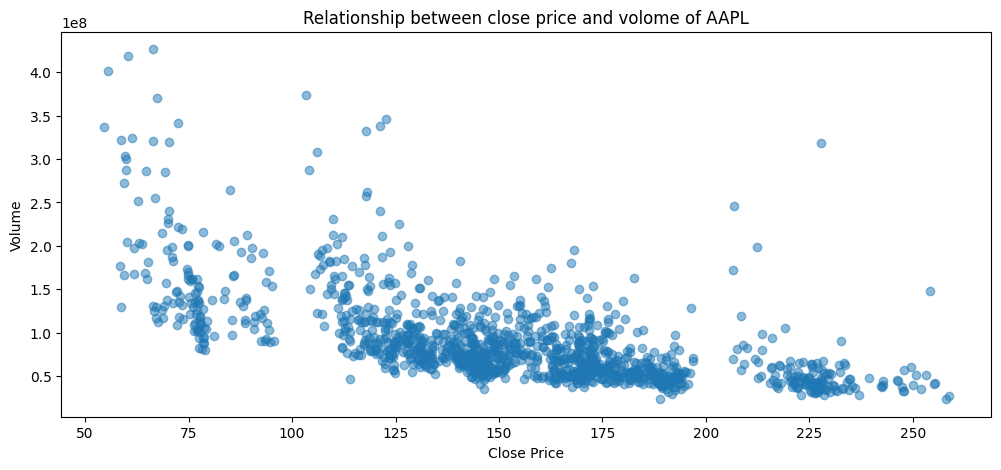

In [19]:
plot_close_volume(aapl_df, 'AAPL')

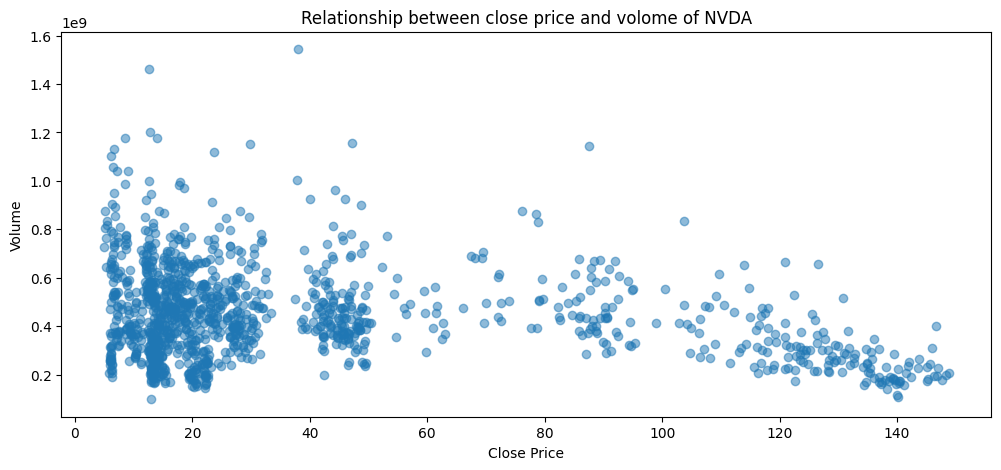

In [20]:
plot_close_volume(nvda_df, 'NVDA')

Có thể thấy với AAPL thì xu hướng rõ ràng là giá tăng thì khối lượng giao dịch có xu hướng giảm. Trong khi NVDA vẫn khá khó đoán.

### Tương quan giữa các đặc trưng

In [21]:
def plot_corr(df: pd.DataFrame, ticker: str):
    corr = df[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
    plt.figure(figsize=(8,6))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title(f'Corr Matrix of {ticker}')
    plt.show()

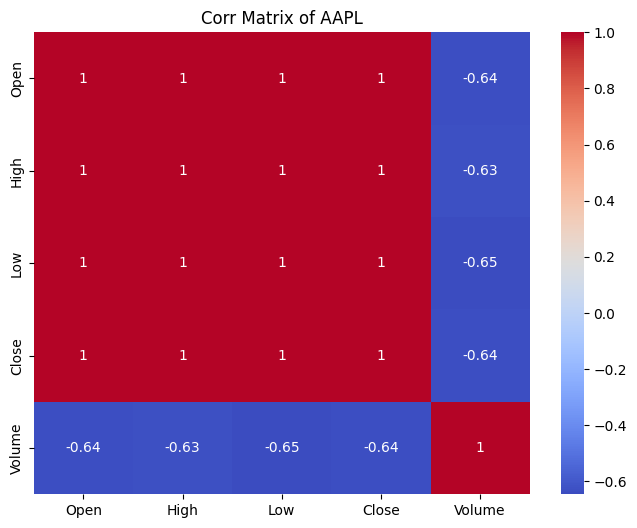

In [22]:
plot_corr(aapl_df, 'AAPL')

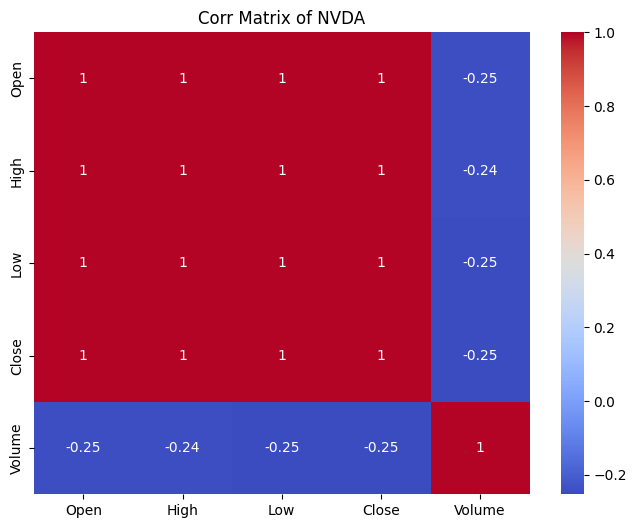

In [23]:
plot_corr(nvda_df, 'NVDA')

Các đặc trưng Open, High, Low và Close có mức tương quan hoàn hảo, vì vậy ta sẽ bỏ 3 đặc trưng Open, High, Low và chỉ giữ lại Volume và Close.

## Tiền xử lý

In [24]:
df.isna().sum()

Open            2302
High            2302
Low             2302
Close           2302
Volume          2302
Ticker             0
Collect Date       0
dtype: int64

In [25]:
data_processor.handle_missing_data(start_date, end_date, features=['Close', 'Volume'])

In [26]:
data_processor.df[['Close', 'Volume']].isna().sum()

Close     0
Volume    0
dtype: int64

In [27]:
data_processor.scale(features=['Close', 'Volume'])

In [31]:
data_processor.scaler.get_feature_names_out()

array(['Close', 'Volume'], dtype=object)

In [32]:
data_processor.df[['Close', 'Volume']].describe()

,Close,Volume
count,6.138200e+04,61382.000000
mean,1.147538e+00,0.954034
std,3.982373e+00,3.644654
min,-4.600285e-01,-0.379361
25%,-2.795956e-01,-0.256806
50%,1.428600e-08,0.000000
75%,7.204044e-01,0.743194
max,4.406394e+01,75.384354


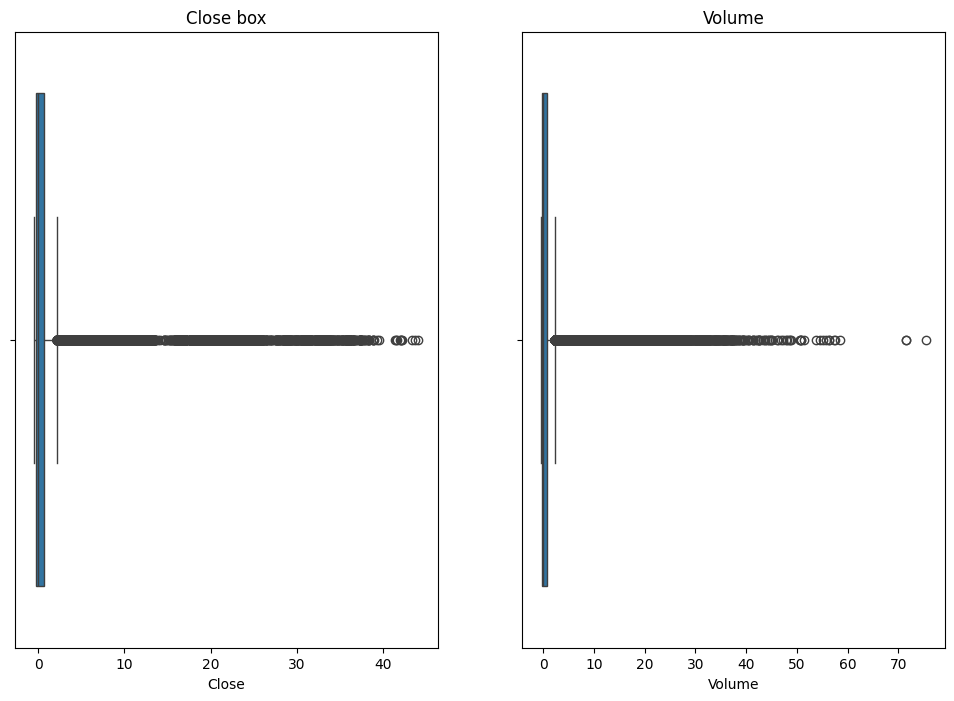

In [33]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x=data_processor.df['Close'])
plt.title('Close box')
plt.subplot(1,2,2)
sns.boxplot(x=data_processor.df['Volume'])
plt.title('Volume')
plt.show()